In [1]:
import math
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings     # for supressing a warning when importing large files
warnings.filterwarnings("ignore")
from pylab import rcParams
%matplotlib inline
sns.set(style='whitegrid', palette='muted', font_scale=1.5)
rcParams['figure.figsize'] = 14, 8

In [2]:
# Load Sample 100+ Dataset
Train=pd.read_csv("Datasets/health/train_labels.csv")
Train_Beneficiarydata=pd.read_csv("Datasets/health/train_beni_sample.csv")
Train_Inpatientdata=pd.read_csv("Datasets/health/train_inpatient_sample.csv")
Train_Outpatientdata=pd.read_csv("Datasets/health/train_outpatient_sample.csv")


# # Load Train Dataset
# Train=pd.read_csv("./input/Train-1542865627584.csv")
# Train_Beneficiarydata=pd.read_csv("./input/Train_Beneficiarydata-1542865627584.csv")
# Train_Inpatientdata=pd.read_csv("./input/Train_Inpatientdata-1542865627584.csv")
# Train_Outpatientdata=pd.read_csv("./input/Train_Outpatientdata-1542865627584.csv")

# Load Test Dataset
# Test=pd.read_csv("./input/Test-1542969243754.csv")
# Test_Beneficiarydata=pd.read_csv("./input/Test_Beneficiarydata-1542969243754.csv")
# Test_Inpatientdata=pd.read_csv("./input/Test_Inpatientdata-1542969243754.csv")
# Test_Outpatientdata=pd.read_csv("./input/Test_Outpatientdata-1542969243754.csv")

In [3]:
## Lets Check Shape of datasets 

print('Shape of Train data :',Train.shape) # potential fraud by provider
print('Shape of Train_Beneficiarydata data :',Train_Beneficiarydata.shape) # beneficiary data
print('Shape of Train_Inpatientdata data :',Train_Inpatientdata.shape) # inpatient data
print('Shape of Train_Outpatientdata data :',Train_Outpatientdata.shape) # outpatient data

# print('Shape of Test data :',Test.shape)
# print('Shape of Test_Beneficiarydata data :',Test_Beneficiarydata.shape)
# print('Shape of Test_Inpatientdata data :',Test_Inpatientdata.shape)
# print('Shape of Test_Outpatientdata data :',Test_Outpatientdata.shape)

Shape of Train data : (5410, 2)
Shape of Train_Beneficiarydata data : (138556, 25)
Shape of Train_Inpatientdata data : (40474, 30)
Shape of Train_Outpatientdata data : (517737, 27)


In [4]:
df_inpatient = pd.merge(Train_Beneficiarydata, Train_Inpatientdata, on='BeneID', how='left')
df_inpatient_fraud = pd.merge(df_inpatient, Train, on='Provider', how='left')
df_inpatient_fraud.dropna(subset=['PotentialFraud'], inplace=True)
df_inpatient_fraud.reset_index(drop=True, inplace=True)

In [5]:
print(Train_Beneficiarydata.shape)
print(Train_Inpatientdata.shape)
print(Train.shape)
print(df_inpatient.shape)
print(df_inpatient_fraud.shape)

df_inpatient_fraud.head()

(138556, 25)
(40474, 30)
(5410, 2)
(147741, 54)
(40474, 55)


,BeneID,DOB,DOD,Gender,Race,RenalDiseaseIndicator,State,County,NoOfMonths_PartACov,NoOfMonths_PartBCov,...,ClmDiagnosisCode_8,ClmDiagnosisCode_9,ClmDiagnosisCode_10,ClmProcedureCode_1,ClmProcedureCode_2,ClmProcedureCode_3,ClmProcedureCode_4,ClmProcedureCode_5,ClmProcedureCode_6,PotentialFraud
0,BENE11001,1943-01-01,NaN,1,1,0,39,230,12,12,...,19889,5849,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Yes
1,BENE11001,1943-01-01,NaN,1,1,0,39,230,12,12,...,NaN,NaN,NaN,7092.0,NaN,NaN,NaN,NaN,NaN,No
2,BENE11001,1943-01-01,NaN,1,1,0,39,230,12,12,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,No
3,BENE11011,1914-03-01,NaN,2,2,0,1,360,12,12,...,40390,4019,NaN,331.0,NaN,NaN,NaN,NaN,NaN,No
4,BENE11014,1938-04-01,NaN,2,1,Y,45,780,12,12,...,29620,20300,NaN,3893.0,NaN,NaN,NaN,NaN,NaN,No


In [6]:
print(df_inpatient_fraud.keys())

Index(['BeneID', 'DOB', 'DOD', 'Gender', 'Race', 'RenalDiseaseIndicator',
       'State', 'County', 'NoOfMonths_PartACov', 'NoOfMonths_PartBCov',
       'ChronicCond_Alzheimer', 'ChronicCond_Heartfailure',
       'ChronicCond_KidneyDisease', 'ChronicCond_Cancer',
       'ChronicCond_ObstrPulmonary', 'ChronicCond_Depression',
       'ChronicCond_Diabetes', 'ChronicCond_IschemicHeart',
       'ChronicCond_Osteoporasis', 'ChronicCond_rheumatoidarthritis',
       'ChronicCond_stroke', 'IPAnnualReimbursementAmt',
       'IPAnnualDeductibleAmt', 'OPAnnualReimbursementAmt',
       'OPAnnualDeductibleAmt', 'ClaimID', 'ClaimStartDt', 'ClaimEndDt',
       'Provider', 'InscClaimAmtReimbursed', 'AttendingPhysician',
       'OperatingPhysician', 'OtherPhysician', 'AdmissionDt',
       'ClmAdmitDiagnosisCode', 'DeductibleAmtPaid', 'DischargeDt',
       'DiagnosisGroupCode', 'ClmDiagnosisCode_1', 'ClmDiagnosisCode_2',
       'ClmDiagnosisCode_3', 'ClmDiagnosisCode_4', 'ClmDiagnosisCode_5',
       'Cl

In [7]:
df_inpatient_fraud.dtypes

BeneID                              object
DOB                                 object
DOD                                 object
Gender                               int64
Race                                 int64
RenalDiseaseIndicator               object
State                                int64
County                               int64
NoOfMonths_PartACov                  int64
NoOfMonths_PartBCov                  int64
ChronicCond_Alzheimer                int64
ChronicCond_Heartfailure             int64
ChronicCond_KidneyDisease            int64
ChronicCond_Cancer                   int64
ChronicCond_ObstrPulmonary           int64
ChronicCond_Depression               int64
ChronicCond_Diabetes                 int64
ChronicCond_IschemicHeart            int64
ChronicCond_Osteoporasis             int64
ChronicCond_rheumatoidarthritis      int64
ChronicCond_stroke                   int64
IPAnnualReimbursementAmt             int64
IPAnnualDeductibleAmt                int64
OPAnnualRei

In [8]:
df_inpatient_fraud['AdmissionDt'] = pd.to_datetime(df_inpatient_fraud['AdmissionDt']).dt.date
df_inpatient_fraud['AdmissionDt'] = df_inpatient_fraud['AdmissionDt'].astype('datetime64')
df_inpatient_fraud['DischargeDt'] = pd.to_datetime(df_inpatient_fraud['DischargeDt']).dt.date
df_inpatient_fraud['DischargeDt'] = df_inpatient_fraud['DischargeDt'].astype('datetime64')
df_inpatient_fraud['Gender'] = df_inpatient_fraud['Gender'].astype('category')
df_inpatient_fraud['Race'] = df_inpatient_fraud['Race'].astype('category')
df_inpatient_fraud['State'] = df_inpatient_fraud['State'].astype('category')
df_inpatient_fraud['County'] = df_inpatient_fraud['County'].astype('category')
df_inpatient_fraud['PotentialFraud'] = df_inpatient_fraud['PotentialFraud'].astype('category')
df_inpatient_fraud['PotentialFraudCode'] = df_inpatient_fraud['PotentialFraud'].cat.codes

df_inpatient_fraud.dtypes

BeneID                                     object
DOB                                        object
DOD                                        object
Gender                                   category
Race                                     category
RenalDiseaseIndicator                      object
State                                    category
County                                   category
NoOfMonths_PartACov                         int64
NoOfMonths_PartBCov                         int64
ChronicCond_Alzheimer                       int64
ChronicCond_Heartfailure                    int64
ChronicCond_KidneyDisease                   int64
ChronicCond_Cancer                          int64
ChronicCond_ObstrPulmonary                  int64
ChronicCond_Depression                      int64
ChronicCond_Diabetes                        int64
ChronicCond_IschemicHeart                   int64
ChronicCond_Osteoporasis                    int64
ChronicCond_rheumatoidarthritis             int64


In [9]:
df_inpatient_fraud[['BeneID', 'Provider', 'AdmissionDt', 'DischargeDt', 'PotentialFraud', 'PotentialFraudCode']]

,BeneID,Provider,AdmissionDt,DischargeDt,PotentialFraud,PotentialFraudCode
0,BENE11001,PRV55912,2009-04-12,2009-04-18,Yes,1
1,BENE11001,PRV55907,2009-08-31,2009-09-02,No,0
2,BENE11001,PRV56046,2009-09-17,2009-09-20,No,0
3,BENE11011,PRV52405,2009-02-14,2009-02-22,No,0
4,BENE11014,PRV56614,2009-08-13,2009-08-30,No,0
...,...,...,...,...,...,...
40469,BENE159167,PRV53671,2009-09-28,2009-10-02,Yes,1
40470,BENE159175,PRV54981,2009-11-03,2009-11-06,No,0
40471,BENE159177,PRV56588,2009-11-18,2009-11-22,Yes,1
40472,BENE159177,PRV56575,2009-12-17,2009-12-18,Yes,1


In [10]:
df_inpatient_fraud[df_inpatient_fraud['Provider'] == 'PRV53671'][['BeneID', 'Provider', 'PotentialFraud', 'DiagnosisGroupCode', 'ClmDiagnosisCode_1', 'ClmDiagnosisCode_2',
       'ClmDiagnosisCode_3', 'ClmDiagnosisCode_4', 'ClmDiagnosisCode_5',
       'ClmDiagnosisCode_6', 'ClmDiagnosisCode_7', 'ClmDiagnosisCode_8',
       'ClmDiagnosisCode_9', 'ClmDiagnosisCode_10', 'ClmProcedureCode_1',
       'ClmProcedureCode_2', 'ClmProcedureCode_3', 'ClmProcedureCode_4',
       'ClmProcedureCode_5', 'ClmProcedureCode_6']].head(10)

,BeneID,Provider,PotentialFraud,DiagnosisGroupCode,ClmDiagnosisCode_1,ClmDiagnosisCode_2,ClmDiagnosisCode_3,ClmDiagnosisCode_4,ClmDiagnosisCode_5,ClmDiagnosisCode_6,ClmDiagnosisCode_7,ClmDiagnosisCode_8,ClmDiagnosisCode_9,ClmDiagnosisCode_10,ClmProcedureCode_1,ClmProcedureCode_2,ClmProcedureCode_3,ClmProcedureCode_4,ClmProcedureCode_5,ClmProcedureCode_6
702,BENE13647,PRV53671,Yes,432,57420,1970,27541,29411,82300,NaN,NaN,NaN,NaN,NaN,3893.0,NaN,NaN,NaN,NaN,NaN
2448,BENE19685,PRV53671,Yes,372,5789,2761,42731,41189,42832,40391,2851,2113,1890,NaN,4443.0,4439.0,NaN,NaN,NaN,NaN
4405,BENE26800,PRV53671,Yes,204,51881,27800,42821,3962,40491,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5079,BENE29246,PRV53671,Yes,310,45340,56210,4019,28521,NaN,NaN,NaN,NaN,NaN,NaN,8703.0,4439.0,NaN,NaN,NaN,NaN
7559,BENE38537,PRV53671,Yes,948,V5789,5533,5368,E9342,78079,4280,2724,V103,30000,NaN,9339.0,NaN,NaN,NaN,NaN,NaN
7713,BENE39189,PRV53671,Yes,471,71536,7213,29650,V5866,NaN,NaN,NaN,NaN,NaN,NaN,8154.0,NaN,NaN,NaN,NaN,NaN
7714,BENE39189,PRV53671,Yes,176,486,78659,2630,53081,78722,25000,5641,515,29040,NaN,8872.0,NaN,NaN,NaN,NaN,NaN
10323,BENE49037,PRV53671,Yes,509,99641,71596,2724,E8798,E8781,2859,NaN,NaN,NaN,NaN,82.0,NaN,NaN,NaN,NaN,NaN
14614,BENE64823,PRV53671,Yes,510,73017,E9422,33818,V1251,2761,70724,2851,496,40391,NaN,8321.0,6822.0,NaN,NaN,NaN,NaN
20135,BENE84789,PRV53671,Yes,368,55001,32723,2851,6101,25000,591,5641,3970,4019,NaN,4573.0,4019.0,NaN,NaN,NaN,NaN


In [11]:
def calc_fraud_agg_by_columns(df, columns):
    dict_fraud_agg = {}
    
    df_temp = df.groupby(columns)['PotentialFraud'].value_counts().unstack().fillna(0)
    
    for row in df_temp.iterrows():
        count_yesno = row[1]['No'] + row[1]['Yes']
        count_yes = row[1]['Yes']
        fraud_ratio = count_yes / count_yesno
        dict_fraud_agg[row[0]] = [count_yesno, count_yes, fraud_ratio]
        for i, _ in enumerate(columns):
            dict_fraud_agg[row[0]].insert(i, row[i])
    
    new_columns = columns.copy()
    new_columns.append('count_cases')
    new_columns.append('count_fraud_cases')
    new_columns.append('ratio_fraud_cases')
    return pd.DataFrame.from_dict(dict_fraud_agg, orient='index', columns=new_columns).reset_index(drop=True)
    
df_fraud_DiagnosisGroupCode = calc_fraud_agg_by_columns(df_inpatient_fraud, ['DiagnosisGroupCode'])
df_fraud_DiagnosisGroupCode.sort_values(by=['ratio_fraud_cases', 'count_cases'], ascending=False, inplace=True)

print(df_fraud_DiagnosisGroupCode.shape)
print(df_fraud_DiagnosisGroupCode.head(100))

(736, 4)
    DiagnosisGroupCode  count_cases  count_fraud_cases  ratio_fraud_cases
637                843            6                  6           1.000000
640                846            5                  5           1.000000
95                 124            4                  4           1.000000
89                 113            3                  3           1.000000
91                 115            2                  2           1.000000
..                 ...          ...                ...                ...
251                328           64                 43           0.671875
250                327           75                 50           0.666667
480                620           63                 42           0.666667
388                495           48                 32           0.666667
63                 078           45                 30           0.666667

[100 rows x 4 columns]


In [12]:
def draw_line_plot(df, x, y, title, xlabel, ylabel):
    plt.figure(figsize=(10,10), dpi=80)
    sns.catplot(kind="bar", data=df, x=x, y=y)
    
    plt.title(title, fontsize=18)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.xticks(fontsize=12)
    plt.yticks(fontsize=12)
    plt.show()

(736, 4)
(10, 4)


<Figure size 800x800 with 0 Axes>

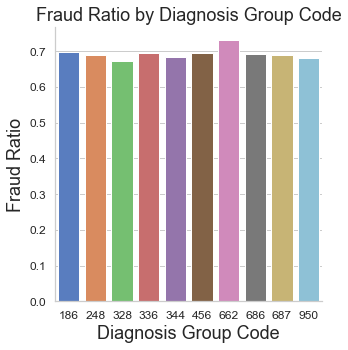

In [13]:
df_fraud_DiagnosisGroupCode = calc_fraud_agg_by_columns(df_inpatient_fraud, ['DiagnosisGroupCode'])
print(df_fraud_DiagnosisGroupCode.shape)

# df_fraud_DiagnosisGroupCode.sort_values(by=['ratio_fraud_cases', 'count_cases'], ascending=False, inplace=True)
df_fraud_DiagnosisGroupCode = df_fraud_DiagnosisGroupCode[df_fraud_DiagnosisGroupCode['count_cases'] > 50]
df_fraud_DiagnosisGroupCode = df_fraud_DiagnosisGroupCode[df_fraud_DiagnosisGroupCode['ratio_fraud_cases'] > 0.67]

print(df_fraud_DiagnosisGroupCode.shape)
draw_line_plot(df_fraud_DiagnosisGroupCode, 'DiagnosisGroupCode', 'ratio_fraud_cases', 'Fraud Ratio by Diagnosis Group Code', 'Diagnosis Group Code', 'Fraud Ratio')

(736, 4)
(16, 4)


<Figure size 800x800 with 0 Axes>

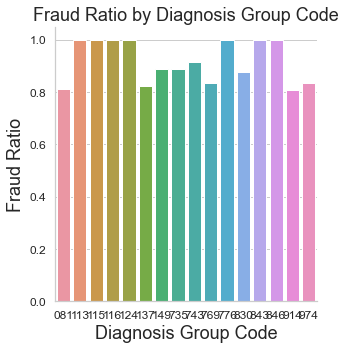

In [14]:
df_fraud_DiagnosisGroupCode = calc_fraud_agg_by_columns(df_inpatient_fraud, ['DiagnosisGroupCode'])
print(df_fraud_DiagnosisGroupCode.shape)

# df_fraud_DiagnosisGroupCode.sort_values(by=['ratio_fraud_cases', 'count_cases'], ascending=False, inplace=True)
df_fraud_DiagnosisGroupCode = df_fraud_DiagnosisGroupCode[df_fraud_DiagnosisGroupCode['count_cases'] > 1]
df_fraud_DiagnosisGroupCode = df_fraud_DiagnosisGroupCode[df_fraud_DiagnosisGroupCode['ratio_fraud_cases'] > 0.80]

print(df_fraud_DiagnosisGroupCode.shape)
draw_line_plot(df_fraud_DiagnosisGroupCode, 'DiagnosisGroupCode', 'ratio_fraud_cases', 'Fraud Ratio by Diagnosis Group Code', 'Diagnosis Group Code', 'Fraud Ratio')

(31289, 4)
(19, 4)


<Figure size 800x800 with 0 Axes>

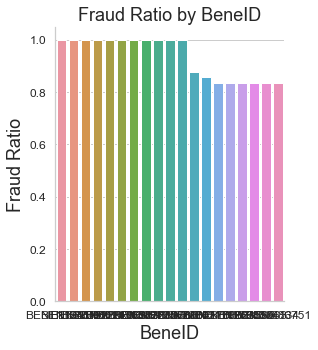

,BeneID,count_cases,count_fraud_cases,ratio_fraud_cases
4361,BENE119457,7,7,1.000000
23217,BENE62091,7,7,1.000000
4443,BENE119780,6,6,1.000000
5163,BENE122820,6,6,1.000000
5468,BENE124069,6,6,1.000000
6959,BENE130582,6,6,1.000000
7043,BENE130973,6,6,1.000000
7099,BENE13119,6,6,1.000000
16263,BENE28270,6,6,1.000000
22111,BENE56800,6,6,1.000000


In [15]:
df_fraud_BeneID = calc_fraud_agg_by_columns(df_inpatient_fraud, ['BeneID'])
print(df_fraud_BeneID.shape)

df_fraud_BeneID.sort_values(by=['ratio_fraud_cases', 'count_cases'], ascending=False, inplace=True)
df_fraud_BeneID = df_fraud_BeneID[df_fraud_BeneID['count_cases'] > 5]
df_fraud_BeneID = df_fraud_BeneID[df_fraud_BeneID['ratio_fraud_cases'] > 0.8]

print(df_fraud_BeneID.shape)
draw_line_plot(df_fraud_BeneID, 'BeneID', 'ratio_fraud_cases', 'Fraud Ratio by BeneID', 'BeneID', 'Fraud Ratio')
df_fraud_BeneID.head(30)

(2092, 4)
(20, 4)


<Figure size 800x800 with 0 Axes>

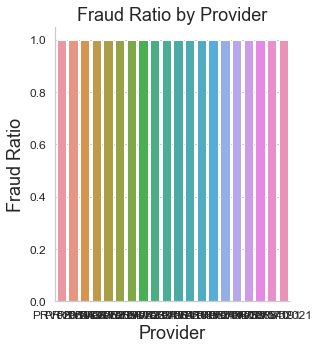

,Provider,count_cases,count_fraud_cases,ratio_fraud_cases
388,PRV52019,516,516,1.0
1408,PRV55462,386,386,1.0
1066,PRV54367,322,322,1.0
896,PRV53706,282,282,1.0
1355,PRV55209,275,275,1.0


In [16]:
df_fraud_Provider = calc_fraud_agg_by_columns(df_inpatient_fraud, ['Provider'])
print(df_fraud_Provider.shape)

df_fraud_Provider.sort_values(by=['ratio_fraud_cases', 'count_cases'], ascending=False, inplace=True)
df_fraud_Provider = df_fraud_Provider[df_fraud_Provider['count_cases'] > 180]
df_fraud_Provider = df_fraud_Provider[df_fraud_Provider['ratio_fraud_cases'] > 0.5]

print(df_fraud_Provider.shape)
draw_line_plot(df_fraud_Provider, 'Provider', 'ratio_fraud_cases', 'Fraud Ratio by Provider', 'Provider', 'Fraud Ratio')
df_fraud_Provider.head()

In [17]:
print(df_inpatient_fraud[['BeneID', 'Provider', 'PotentialFraud', 'PotentialFraudCode']])

           BeneID  Provider PotentialFraud  PotentialFraudCode
0       BENE11001  PRV55912            Yes                   1
1       BENE11001  PRV55907             No                   0
2       BENE11001  PRV56046             No                   0
3       BENE11011  PRV52405             No                   0
4       BENE11014  PRV56614             No                   0
...           ...       ...            ...                 ...
40469  BENE159167  PRV53671            Yes                   1
40470  BENE159175  PRV54981             No                   0
40471  BENE159177  PRV56588            Yes                   1
40472  BENE159177  PRV56575            Yes                   1
40473  BENE159188  PRV54765            Yes                   1

[40474 rows x 4 columns]


In [18]:
def drawCorrellogram(df):
    columns = df.columns.tolist()
    df_temp = df[columns]
    
    # Plot
    plt.figure(figsize=(12,12), dpi=80)
    sns.set(font_scale=0.9)
    sns.heatmap(df_temp.corr(), xticklabels=df_temp.corr().columns, yticklabels=df_temp.corr().columns, cmap='RdYlGn', center=0, annot=True)

    # Decorations
    plt.show()

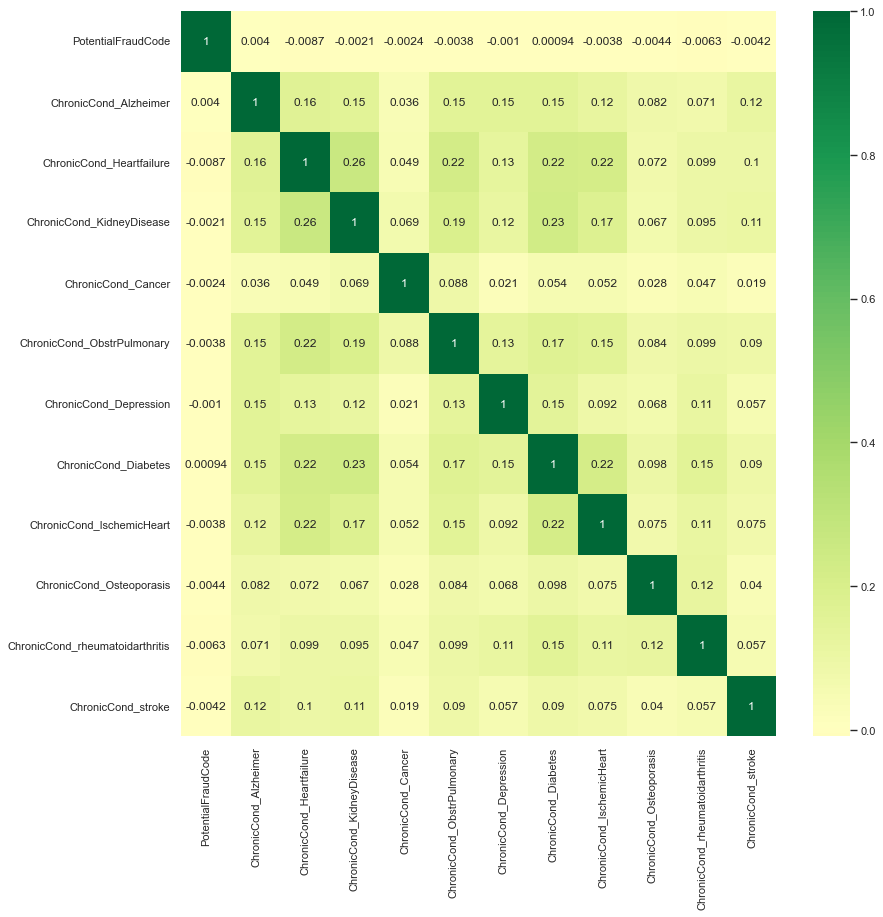

In [19]:
drawCorrellogram(df_inpatient_fraud[['PotentialFraudCode',
    'ChronicCond_Alzheimer', 'ChronicCond_Heartfailure',
    'ChronicCond_KidneyDisease', 'ChronicCond_Cancer',
    'ChronicCond_ObstrPulmonary', 'ChronicCond_Depression',
    'ChronicCond_Diabetes', 'ChronicCond_IschemicHeart',
    'ChronicCond_Osteoporasis', 'ChronicCond_rheumatoidarthritis',
    'ChronicCond_stroke']])

In [20]:
print(df_inpatient_fraud.keys())

Index(['BeneID', 'DOB', 'DOD', 'Gender', 'Race', 'RenalDiseaseIndicator',
       'State', 'County', 'NoOfMonths_PartACov', 'NoOfMonths_PartBCov',
       'ChronicCond_Alzheimer', 'ChronicCond_Heartfailure',
       'ChronicCond_KidneyDisease', 'ChronicCond_Cancer',
       'ChronicCond_ObstrPulmonary', 'ChronicCond_Depression',
       'ChronicCond_Diabetes', 'ChronicCond_IschemicHeart',
       'ChronicCond_Osteoporasis', 'ChronicCond_rheumatoidarthritis',
       'ChronicCond_stroke', 'IPAnnualReimbursementAmt',
       'IPAnnualDeductibleAmt', 'OPAnnualReimbursementAmt',
       'OPAnnualDeductibleAmt', 'ClaimID', 'ClaimStartDt', 'ClaimEndDt',
       'Provider', 'InscClaimAmtReimbursed', 'AttendingPhysician',
       'OperatingPhysician', 'OtherPhysician', 'AdmissionDt',
       'ClmAdmitDiagnosisCode', 'DeductibleAmtPaid', 'DischargeDt',
       'DiagnosisGroupCode', 'ClmDiagnosisCode_1', 'ClmDiagnosisCode_2',
       'ClmDiagnosisCode_3', 'ClmDiagnosisCode_4', 'ClmDiagnosisCode_5',
       'Cl

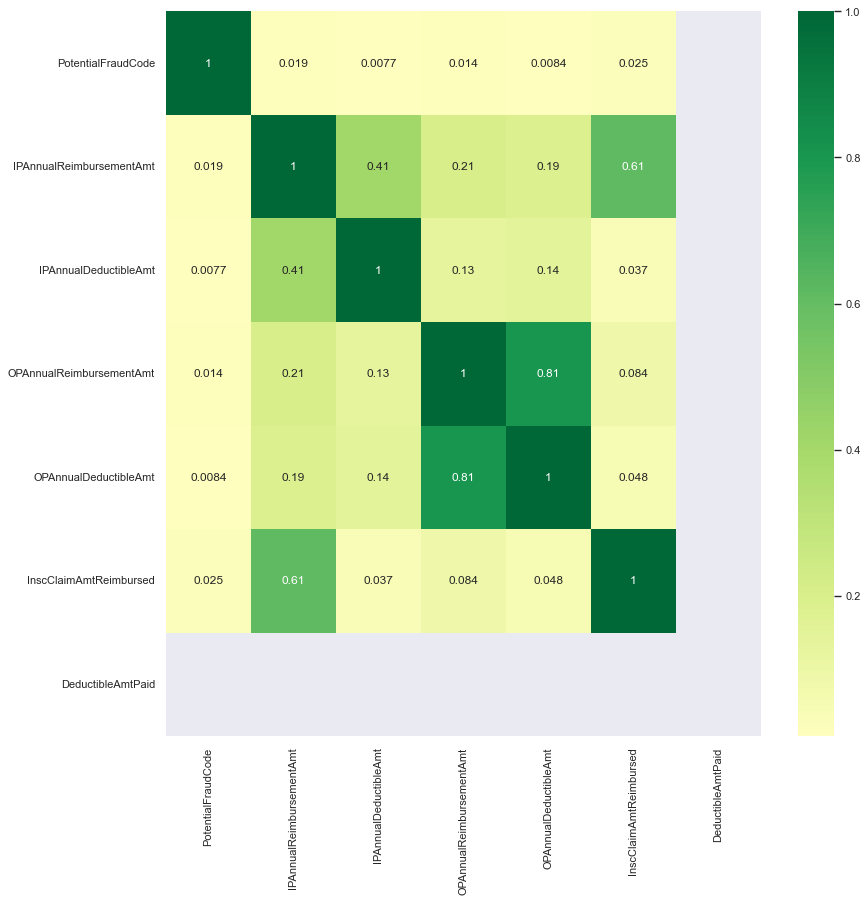

In [21]:
drawCorrellogram(df_inpatient_fraud[['PotentialFraudCode',
    'IPAnnualReimbursementAmt', 'IPAnnualDeductibleAmt', 
    'OPAnnualReimbursementAmt', 'OPAnnualDeductibleAmt',
    'InscClaimAmtReimbursed', 'DeductibleAmtPaid']])

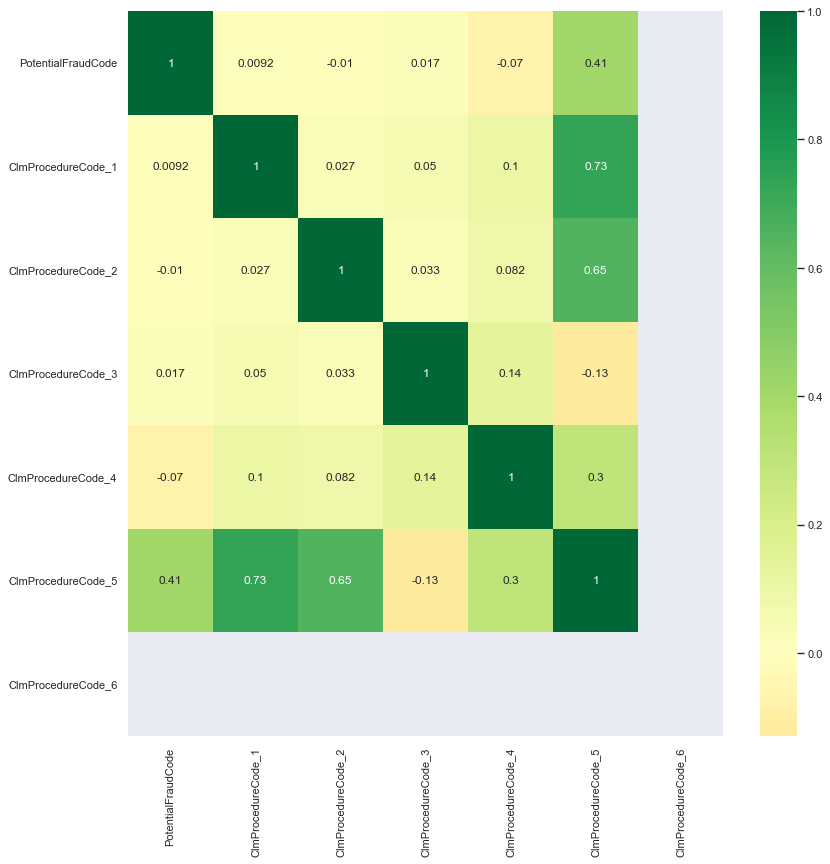

In [22]:
drawCorrellogram(df_inpatient_fraud[['PotentialFraudCode',
    'ClmAdmitDiagnosisCode',
       'DiagnosisGroupCode', 'ClmDiagnosisCode_1', 'ClmDiagnosisCode_2',
       'ClmDiagnosisCode_3', 'ClmDiagnosisCode_4', 'ClmDiagnosisCode_5',
       'ClmDiagnosisCode_6', 'ClmDiagnosisCode_7', 'ClmDiagnosisCode_8',
       'ClmDiagnosisCode_9', 'ClmDiagnosisCode_10', 'ClmProcedureCode_1',
       'ClmProcedureCode_2', 'ClmProcedureCode_3', 'ClmProcedureCode_4',
       'ClmProcedureCode_5', 'ClmProcedureCode_6']])

In [23]:
df_inpatient_fraud['Age'] = df_inpatient_fraud['DOB'].apply(lambda x : 2022 - int(x[0:4]))
df_inpatient_fraud['AgeRange'] = df_inpatient_fraud['Age'].apply(lambda x : math.floor(x/10) * 10)
df_inpatient_fraud['AgeRange'] = df_inpatient_fraud['AgeRange'].astype('category')
df_inpatient_fraud[['Age', 'AgeRange']].head(10)

,Age,AgeRange
0,79,70
1,79,70
2,79,70
3,108,100
4,84,80
5,82,80
6,83,80
7,81,80
8,78,70
9,76,70


(9, 4)
(9, 4)


<Figure size 800x800 with 0 Axes>

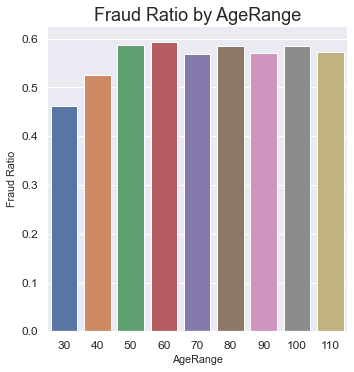

,AgeRange,count_cases,count_fraud_cases,ratio_fraud_cases
0,30,39,18,0.461538
1,40,607,319,0.525535
2,50,1228,721,0.587134
3,60,2286,1358,0.594051
4,70,4294,2440,0.568235


In [24]:
df_fraud_AgeRange = calc_fraud_agg_by_columns(df_inpatient_fraud, ['AgeRange'])
print(df_fraud_AgeRange.shape)

# df_fraud_AgeRange.sort_values(by=['ratio_fraud_cases', 'count_cases'], ascending=False, inplace=True)
# df_fraud_AgeRange = df_fraud_AgeRange[df_fraud_AgeRange['count_cases'] > 180]
# df_fraud_AgeRange = df_fraud_AgeRange[df_fraud_AgeRange['ratio_fraud_cases'] > 0.5]

print(df_fraud_AgeRange.shape)
draw_line_plot(df_fraud_AgeRange, 'AgeRange', 'ratio_fraud_cases', 'Fraud Ratio by AgeRange', 'AgeRange', 'Fraud Ratio')
df_fraud_AgeRange.head()

In [25]:
df_inpatient_fraud['HospitalizationPeriod'] = df_inpatient_fraud.apply(lambda x : x['DischargeDt'] - x['AdmissionDt'], axis=1)
df_inpatient_fraud['HospitalizationPeriod'] = df_inpatient_fraud['HospitalizationPeriod'].astype('timedelta64[D]')
df_inpatient_fraud['HospitalizationPeriodRange'] = df_inpatient_fraud['HospitalizationPeriod'] # .apply(lambda x : math.floor(x/10) * 10)
df_inpatient_fraud['HospitalizationPeriodRange'] = df_inpatient_fraud['HospitalizationPeriodRange'].astype('category')
df_inpatient_fraud[['HospitalizationPeriod', 'HospitalizationPeriodRange']].head(10)

,HospitalizationPeriod,HospitalizationPeriodRange
0,6.0,6.0
1,2.0,2.0
2,3.0,3.0
3,8.0,8.0
4,17.0,17.0
5,6.0,6.0
6,5.0,5.0
7,4.0,4.0
8,3.0,3.0
9,7.0,7.0


(36, 4)
(36, 4)


<Figure size 800x800 with 0 Axes>

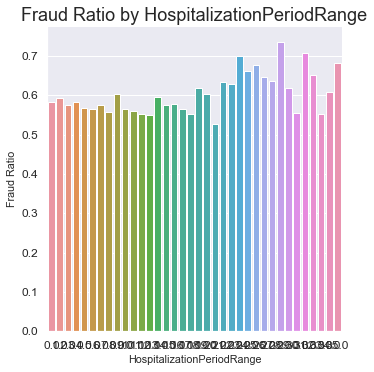

,HospitalizationPeriodRange,count_cases,count_fraud_cases,ratio_fraud_cases
0,0.0,605,353,0.583471
1,1.0,4591,2724,0.593335
2,2.0,6117,3517,0.574955
3,3.0,6902,4019,0.582295
4,4.0,4994,2832,0.567080


In [26]:
df_fraud_HospitalizationPeriodRange = calc_fraud_agg_by_columns(df_inpatient_fraud, ['HospitalizationPeriodRange'])
print(df_fraud_HospitalizationPeriodRange.shape)

# df_fraud_HospitalizationPeriodRange.sort_values(by=['ratio_fraud_cases', 'count_cases'], ascending=False, inplace=True)
# df_fraud_HospitalizationPeriodRange = df_fraud_HospitalizationPeriodRange[df_fraud_HospitalizationPeriodRange['count_cases'] > 180]
# df_fraud_HospitalizationPeriodRange = df_fraud_HospitalizationPeriodRange[df_fraud_HospitalizationPeriodRange['ratio_fraud_cases'] > 0.5]

print(df_fraud_HospitalizationPeriodRange.shape)
draw_line_plot(df_fraud_HospitalizationPeriodRange, 'HospitalizationPeriodRange', 'ratio_fraud_cases', 'Fraud Ratio by HospitalizationPeriodRange', 'HospitalizationPeriodRange', 'Fraud Ratio')
df_fraud_HospitalizationPeriodRange.head()

In [27]:
df_inpatient_fraud[['PotentialFraudCode', 'Age', 'HospitalizationPeriod']].corr()

,PotentialFraudCode,Age,HospitalizationPeriod
PotentialFraudCode,1.000000,0.003149,0.015996
Age,0.003149,1.000000,-0.005491
HospitalizationPeriod,0.015996,-0.005491,1.000000


In [28]:
df_inpatient_fraud['HospitalizationPeriodRange'] = df_inpatient_fraud['HospitalizationPeriod'].apply(lambda x : math.floor(x/5) * 5)
df_inpatient_fraud['HospitalizationPeriodRange'] = df_inpatient_fraud['HospitalizationPeriodRange'].astype('category')
df_inpatient_fraud[['HospitalizationPeriod', 'HospitalizationPeriodRange']].head(10)

,HospitalizationPeriod,HospitalizationPeriodRange
0,6.0,5
1,2.0,0
2,3.0,0
3,8.0,5
4,17.0,15
5,6.0,5
6,5.0,5
7,4.0,0
8,3.0,0
9,7.0,5


(8, 4)
(8, 4)


<Figure size 800x800 with 0 Axes>

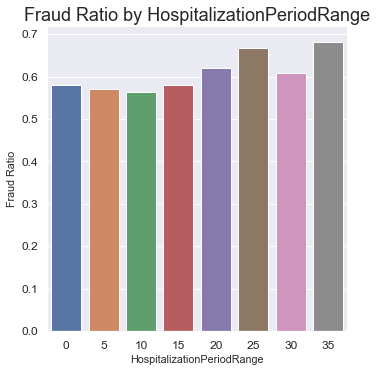

,HospitalizationPeriodRange,count_cases,count_fraud_cases,ratio_fraud_cases
0,0,23209,13445,0.579301
1,5,11268,6438,0.571353
2,10,3205,1808,0.564119
3,15,1365,791,0.579487
4,20,597,371,0.621441


In [29]:
df_fraud_HospitalizationPeriodRange = calc_fraud_agg_by_columns(df_inpatient_fraud, ['HospitalizationPeriodRange'])
print(df_fraud_HospitalizationPeriodRange.shape)

# df_fraud_HospitalizationPeriodRange.sort_values(by=['ratio_fraud_cases', 'count_cases'], ascending=False, inplace=True)
# df_fraud_HospitalizationPeriodRange = df_fraud_HospitalizationPeriodRange[df_fraud_HospitalizationPeriodRange['count_cases'] > 180]
# df_fraud_HospitalizationPeriodRange = df_fraud_HospitalizationPeriodRange[df_fraud_HospitalizationPeriodRange['ratio_fraud_cases'] > 0.5]

print(df_fraud_HospitalizationPeriodRange.shape)
draw_line_plot(df_fraud_HospitalizationPeriodRange, 'HospitalizationPeriodRange', 'ratio_fraud_cases', 'Fraud Ratio by HospitalizationPeriodRange', 'HospitalizationPeriodRange', 'Fraud Ratio')
df_fraud_HospitalizationPeriodRange.head()

   IPAnnualReimbursementAmt IPReimbursementAmtRange
0                     36000                   35000
1                     36000                   35000
2                     36000                   35000
3                      5000                    5000
4                     21260                   20000
5                     22000                   20000
6                      8000                    7500
7                      6000                    5000
8                     23650                   22500
9                    131140                  130000


<Figure size 800x800 with 0 Axes>

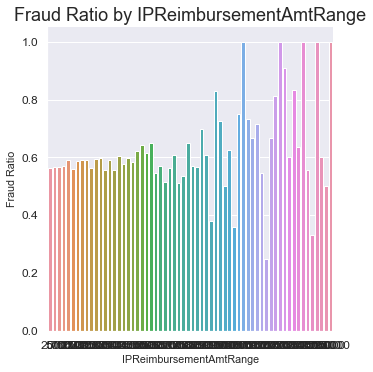

,IPReimbursementAmtRange,count_cases,count_fraud_cases,ratio_fraud_cases
0,0,1643,926,0.563603
1,2500,4920,2790,0.567073
2,5000,6183,3500,0.566068
3,7500,3708,2117,0.570928
4,10000,4925,2908,0.590457


In [30]:
df_inpatient_fraud['IPReimbursementAmtRange'] = df_inpatient_fraud['IPAnnualReimbursementAmt'].apply(lambda x : math.floor(x/2500) * 2500)
df_inpatient_fraud['IPReimbursementAmtRange'] = df_inpatient_fraud['IPReimbursementAmtRange'].astype('category')
print(df_inpatient_fraud[['IPAnnualReimbursementAmt', 'IPReimbursementAmtRange']].head(10))

df_fraud_IPReimbursementAmtRange = calc_fraud_agg_by_columns(df_inpatient_fraud, ['IPReimbursementAmtRange'])
draw_line_plot(df_fraud_IPReimbursementAmtRange, 'IPReimbursementAmtRange', 'ratio_fraud_cases', 'Fraud Ratio by IPReimbursementAmtRange', 'IPReimbursementAmtRange', 'Fraud Ratio')
df_fraud_IPReimbursementAmtRange.head()

   IPAnnualDeductibleAmt IPDeductibleAmtRange
0                   3204                 2500
1                   3204                 2500
2                   3204                 2500
3                   1068                    0
4                   2136                    0
5                   2136                    0
6                   1068                    0
7                   1068                    0
8                   2136                    0
9                   2136                    0


<Figure size 800x800 with 0 Axes>

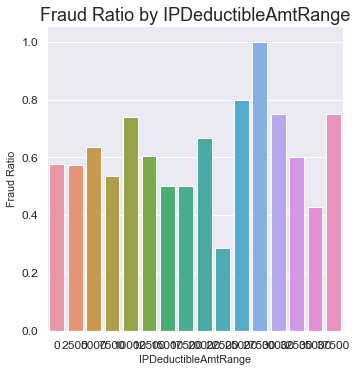

,IPDeductibleAmtRange,count_cases,count_fraud_cases,ratio_fraud_cases
0,0,33887,19551,0.576947
1,2500,5368,3088,0.575261
2,5000,875,557,0.636571
3,7500,123,66,0.536585
4,10000,88,65,0.738636


In [31]:
df_inpatient_fraud['IPDeductibleAmtRange'] = df_inpatient_fraud['IPAnnualDeductibleAmt'].apply(lambda x : math.floor(x/2500) * 2500)
df_inpatient_fraud['IPDeductibleAmtRange'] = df_inpatient_fraud['IPDeductibleAmtRange'].astype('category')
print(df_inpatient_fraud[['IPAnnualDeductibleAmt', 'IPDeductibleAmtRange']].head(10))

df_fraud_IPDeductibleAmtRange = calc_fraud_agg_by_columns(df_inpatient_fraud, ['IPDeductibleAmtRange'])
draw_line_plot(df_fraud_IPDeductibleAmtRange, 'IPDeductibleAmtRange', 'ratio_fraud_cases', 'Fraud Ratio by IPDeductibleAmtRange', 'IPDeductibleAmtRange', 'Fraud Ratio')
df_fraud_IPDeductibleAmtRange.head()

   OPAnnualReimbursementAmt OPReimbursementAmtRange
0                        60                       0
1                        60                       0
2                        60                       0
3                       250                       0
4                       120                       0
5                      1400                       0
6                       860                       0
7                         0                       0
8                        40                       0
9                      1650                       0


<Figure size 800x800 with 0 Axes>

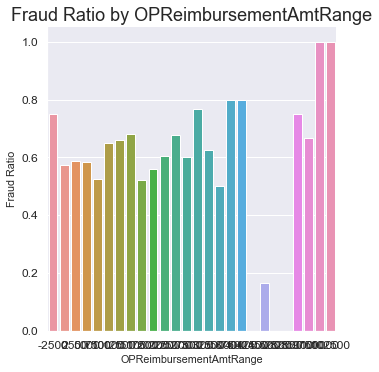

,OPReimbursementAmtRange,count_cases,count_fraud_cases,ratio_fraud_cases
0,-2500,16,12,0.750000
1,0,32293,18575,0.575202
2,2500,5100,2998,0.587843
3,5000,1279,747,0.584050
4,7500,468,246,0.525641


In [32]:
df_inpatient_fraud['OPReimbursementAmtRange'] = df_inpatient_fraud['OPAnnualReimbursementAmt'].apply(lambda x : math.floor(x/2500) * 2500)
df_inpatient_fraud['OPReimbursementAmtRange'] = df_inpatient_fraud['OPReimbursementAmtRange'].astype('category')
print(df_inpatient_fraud[['OPAnnualReimbursementAmt', 'OPReimbursementAmtRange']].head(10))

df_fraud_OPReimbursementAmtRange = calc_fraud_agg_by_columns(df_inpatient_fraud, ['OPReimbursementAmtRange'])
draw_line_plot(df_fraud_OPReimbursementAmtRange, 'OPReimbursementAmtRange', 'ratio_fraud_cases', 'Fraud Ratio by OPReimbursementAmtRange', 'OPReimbursementAmtRange', 'Fraud Ratio')
df_fraud_OPReimbursementAmtRange.head()

   OPAnnualDeductibleAmt OPDeductibleAmtRange
0                     70                    0
1                     70                    0
2                     70                    0
3                    320                    0
4                    100                    0
5                    840                    0
6                     50                    0
7                      0                    0
8                      0                    0
9                     80                    0


<Figure size 800x800 with 0 Axes>

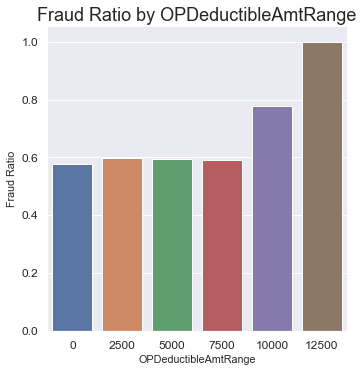

,OPDeductibleAmtRange,count_cases,count_fraud_cases,ratio_fraud_cases
0,0,39136,22602,0.577525
1,2500,857,512,0.597433
2,5000,383,228,0.595300
3,7500,88,52,0.590909
4,10000,9,7,0.777778


In [33]:
df_inpatient_fraud['OPDeductibleAmtRange'] = df_inpatient_fraud['OPAnnualDeductibleAmt'].apply(lambda x : math.floor(x/2500) * 2500)
df_inpatient_fraud['OPDeductibleAmtRange'] = df_inpatient_fraud['OPDeductibleAmtRange'].astype('category')
print(df_inpatient_fraud[['OPAnnualDeductibleAmt', 'OPDeductibleAmtRange']].head(10))

df_fraud_OPDeductibleAmtRange = calc_fraud_agg_by_columns(df_inpatient_fraud, ['OPDeductibleAmtRange'])
draw_line_plot(df_fraud_OPDeductibleAmtRange, 'OPDeductibleAmtRange', 'ratio_fraud_cases', 'Fraud Ratio by OPDeductibleAmtRange', 'OPDeductibleAmtRange', 'Fraud Ratio')
df_fraud_OPDeductibleAmtRange.head()

In [34]:
df_inpatient_fraud.to_csv('./output/inpatient_fraud_cleaned.csv', index=False)